Download packages

In [2]:
import pandas as pd
import os
import pandas_profiling as pp




Import dataset

In [3]:
df = pd.read_csv ('Hotel_Reviews.csv')


Exploratory Data Analysis

In [ ]:
edareport = pp.ProfileReport(df)

# EDA Report

In [ ]:
edareport

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Pre-Proccessing 

In [4]:
import nltk # Natural language processing toolkit
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS #for visual representation of text data.

In [64]:
plt.close("all")

Top 20 words before cleaning 

In [12]:
from collections import Counter 

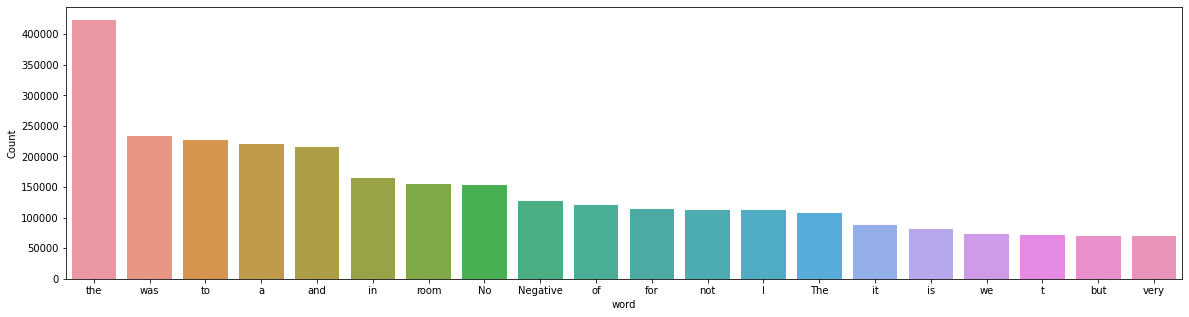

In [6]:
from collections import Counter
df_negative =  df['Negative_Review']

all_words_negative = ' '.join([text for text in df_negative])

split_it_negative = all_words_negative.split()

Counter_negative = Counter(split_it_negative)

most_occur_negative = Counter_negative.most_common(20) # get the 20 most occuring words

words_negative = pd.DataFrame(most_occur_negative, columns = ['word','count' ])

  # plotting 
plt.figure(figsize=(20,5))
ax = sns.barplot(data=words_negative, x= "word", y = "count")
ax.set(ylabel = 'Count')
plt.show()



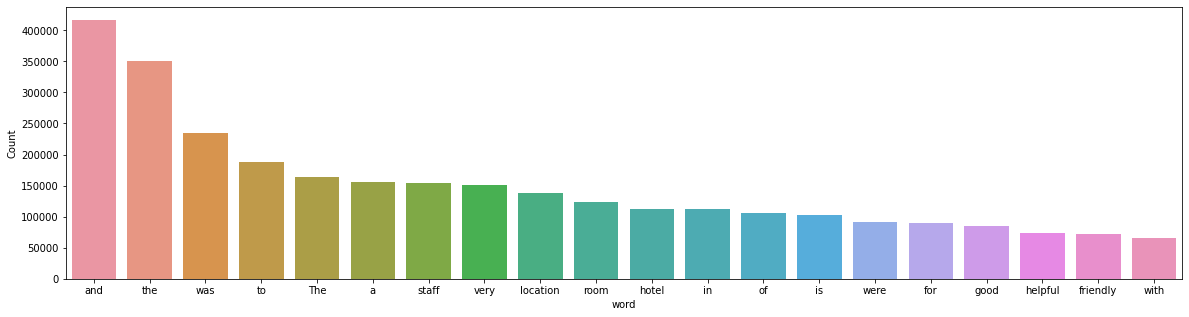

In [7]:
from collections import Counter

df_positive =  df['Positive_Review']

all_words_positive = ' '.join([text for text in df_positive])

split_it_positive = all_words_positive.split()

Counter_positive = Counter(split_it_positive)

most_occur_positive = Counter_positive.most_common(20) # get the 20 most occuring words

words_positive = pd.DataFrame(most_occur_positive, columns = ['word','count' ])

  # plotting 
plt.figure(figsize=(20,5))
ax = sns.barplot(data=words_positive, x= "word", y = "count")
ax.set(ylabel = 'Count')
plt.show()

Removing unwanted characters and stop words 

In [8]:
df['Positive_Review'] = df['Positive_Review'].str.replace("[^a-zA-Z#]", " ")
df['Negative_Review'] = df['Negative_Review'].str.replace("[^a-zA-Z#]", " ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [14]:
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')
# function to remove stopwords
def remove_sw(review):
    review_cleaned = " ".join([x for x in review if x not in stop_words])
    return review_cleaned

# Remove stop words with lengths less then 4
df['Positive_Review'] = df['Positive_Review'].apply(lambda x: ' '.join([z for z in x.split() if len(z)>3]))
df['Negative_Review'] = df['Negative_Review'].apply(lambda x: ' '.join([z for z in x.split() if len(z)>3]))


# Remove the stops words from the reviews 
reviews_positive = [remove_sw(w.split()) for w in df['Positive_Review']]
reviews_negative = [remove_sw(w.split()) for w in df['Negative_Review']]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Frequency of words with stop words removed

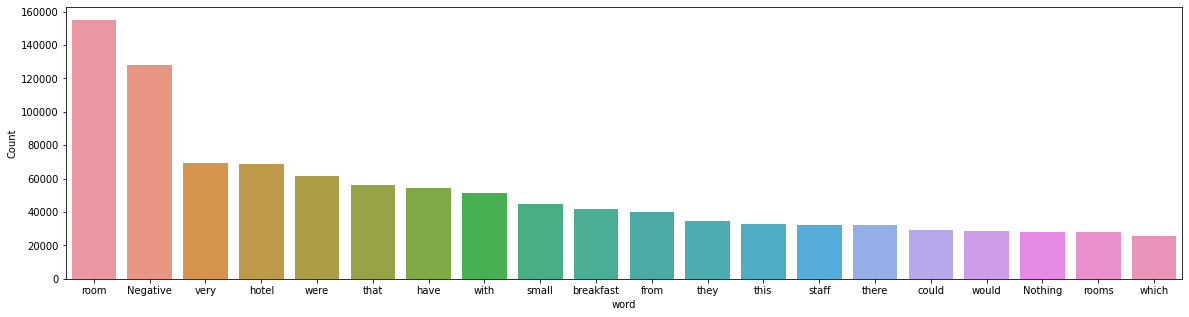

In [15]:
from collections import Counter
df_negative =  df['Negative_Review']

all_words_negative = ' '.join([text for text in df_negative])

split_it_negative = all_words_negative.split()

Counter_negative = Counter(split_it_negative)

most_occur_negative = Counter_negative.most_common(20) # get the 20 most occuring words

words_negative = pd.DataFrame(most_occur_negative, columns = ['word','count' ])

  # plotting 
plt.figure(figsize=(20,5))
ax = sns.barplot(data=words_negative, x= "word", y = "count")
ax.set(ylabel = 'Count')
plt.show()

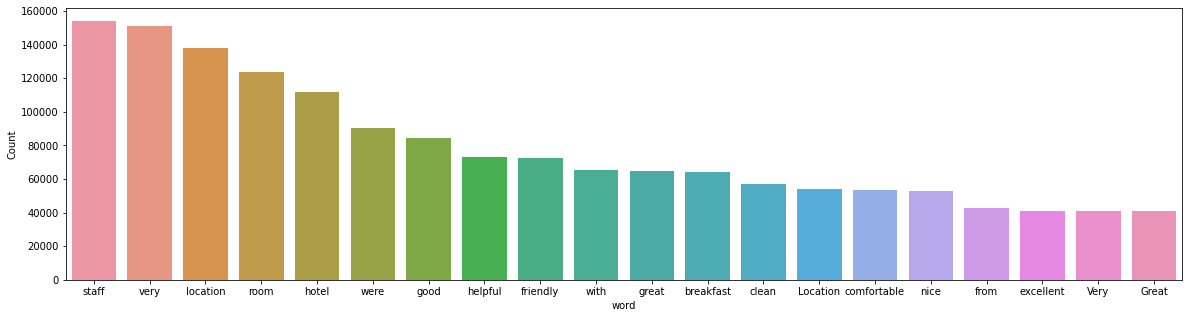

In [16]:
from collections import Counter

df_positive =  df['Positive_Review']

all_words_positive = ' '.join([text for text in df_positive])

split_it_positive = all_words_positive.split()

Counter_positive = Counter(split_it_positive)

most_occur_positive = Counter_positive.most_common(20) # get the 20 most occuring words

words_positive = pd.DataFrame(most_occur_positive, columns = ['word','count' ])

  # plotting 
plt.figure(figsize=(20,5))
ax = sns.barplot(data=words_positive, x= "word", y = "count")
ax.set(ylabel = 'Count')
plt.show()

Negative reviews


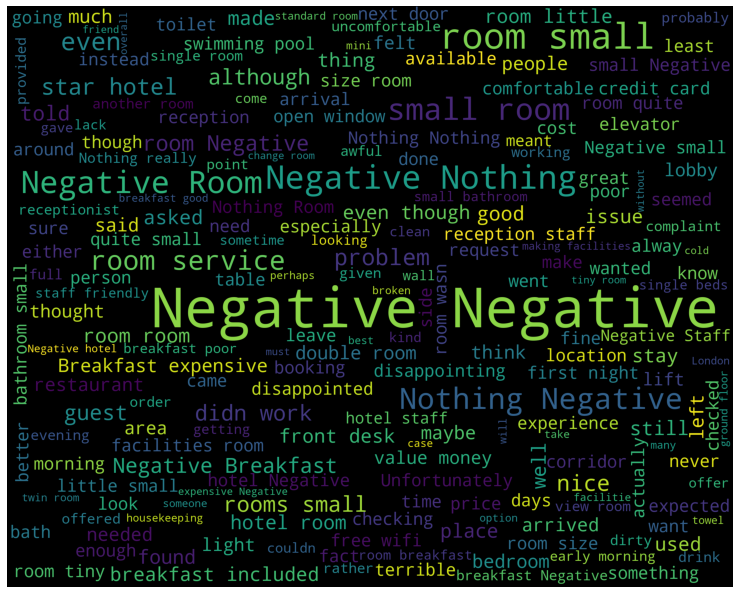

Positive reviews


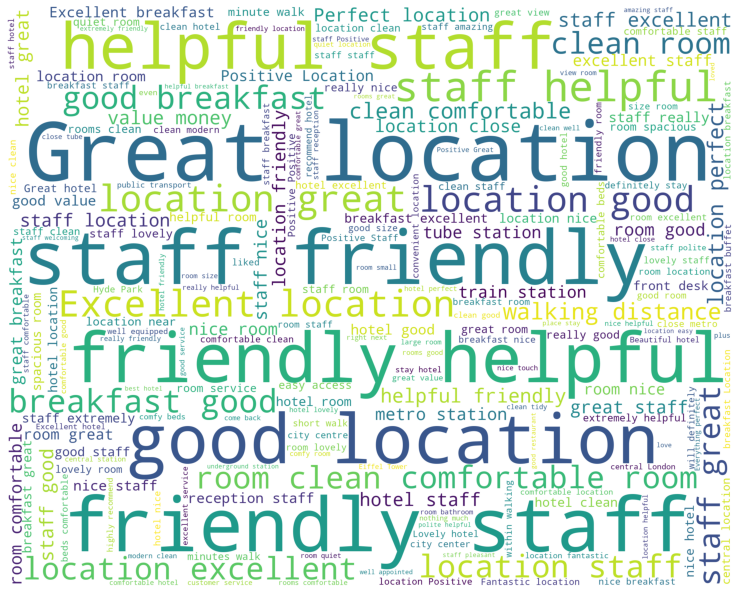

In [17]:
#Word Cloud to represent the data visually 

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

print("Negative reviews")
wordcloud_draw(df_negative)
print("Positive reviews")
wordcloud_draw(df_positive,'white')
